In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import backend as K
print(K.backend())

tensorflow


In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# Create the model
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [5]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              

In [6]:
batch_size = 4
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
13500/13500 [==============================] - 50s 4ms/step - loss: 0.1623 - accuracy: 0.9487 - val_loss: 0.0469 - val_accuracy: 0.9862
Epoch 2/5
13500/13500 [==============================] - 53s 4ms/step - loss: 0.0733 - accuracy: 0.9770 - val_loss: 0.0424 - val_accuracy: 0.9888
Epoch 3/5
13500/13500 [==============================] - 53s 4ms/step - loss: 0.0592 - accuracy: 0.9812 - val_loss: 0.0371 - val_accuracy: 0.9900
Epoch 4/5
13500/13500 [==============================] - 54s 4ms/step - loss: 0.0530 - accuracy: 0.9839 - val_loss: 0.0328 - val_accuracy: 0.9903
Epoch 5/5
13500/13500 [==============================] - 57s 4ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0289 - val_accuracy: 0.9927


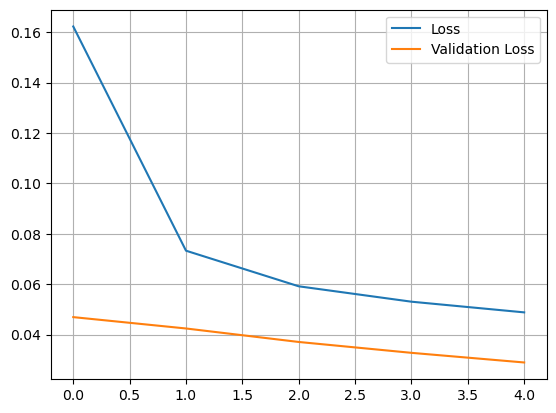

In [7]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025852829217910767
Test accuracy: 0.9908000230789185


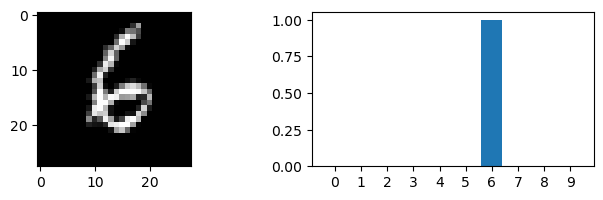

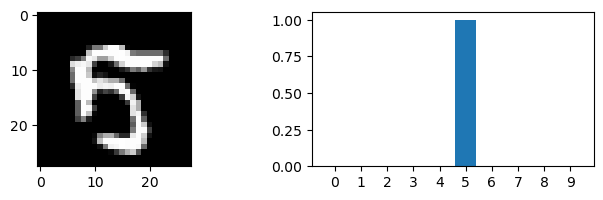

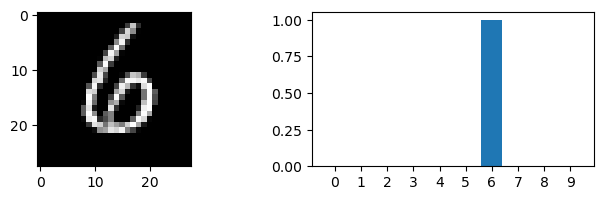

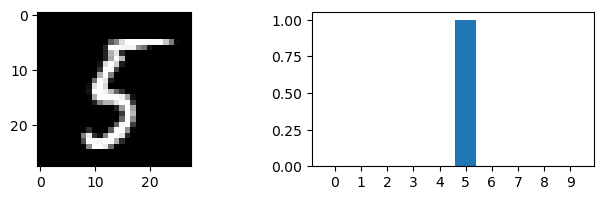

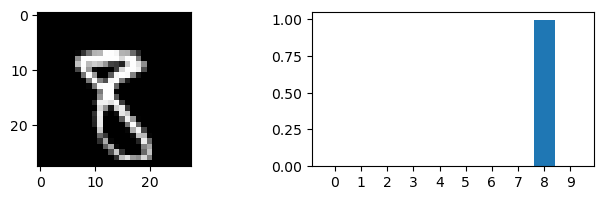

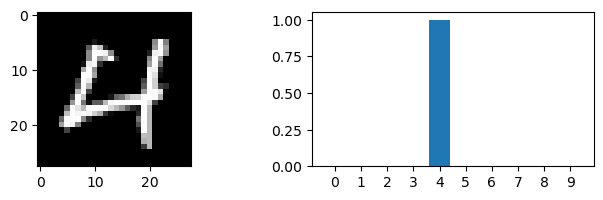

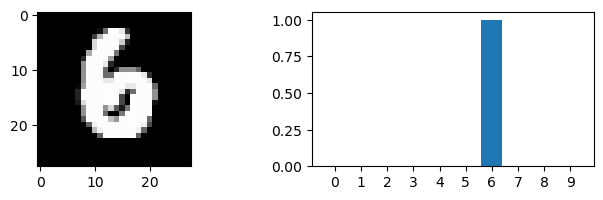

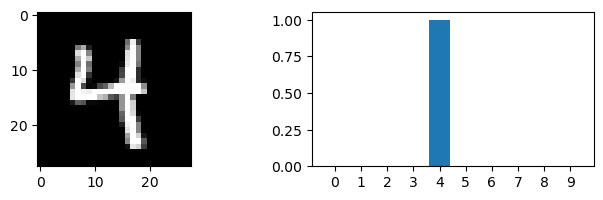

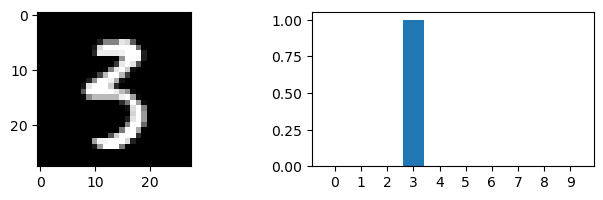

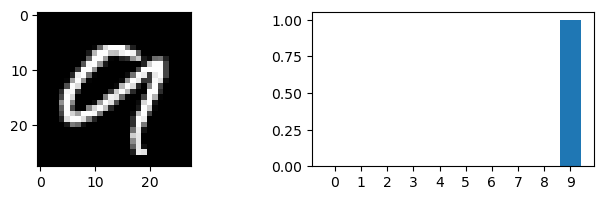

In [9]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 2))
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((28, 28)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    #plt.bar(ind, y[start+k].cpu().detach().numpy().flatten())   # Pytorch
    plt.bar(ind, y[start+k].numpy().flatten())   # Tensorflow
    plt.xticks(range(10))

In [10]:
model.save('./mnist_cnn.keras')

In [11]:
model = keras.models.load_model('mnist_cnn.keras')